In [7]:
from pylab import *

In [8]:
def RK4(EDO,ci,titf,*args,delta=0.1):
    t = arange(titf[0],titf[1]+delta,delta)
    sol = zeros( (len(ci),len(t)) )
    sol[:,0] = array(ci)
    for n in range(len(t)-1):
        tm = t[n] + 0.5*delta
        k1 = EDO(t[n],sol[:,n],*args)
        k2 = EDO(tm,sol[:,n] + 0.5*delta*k1,*args) 
        k3 = EDO(tm,sol[:,n] + 0.5*delta*k2,*args)
        k4 = EDO(t[n+1],sol[:,n] + delta*k3,*args)
        sol[:,n+1] = sol[:,n] + (k1 + 2*(k2+k3) + k4)*(delta/6)
    return sol,t

<img src='./ecs_mini.png' width=300px>

In [24]:
def sist_sol(t,x_v,ms=[0,0]):
    # x_v = xt,yt,vxt,vyt,xp,yp,vxp,vyp
    #       0, 1,  2,  3, 4, 5,  6, 7
    dx_v = np.zeros(len(x_v))
    rt , rp = sqrt( x_v[0]**2 + x_v[1]**2 ) , sqrt( x_v[4]**2 + x_v[5]**2 )
    rpt = sqrt( (x_v[0]-x_v[4])**2 + (x_v[1]-x_v[5])**2 )
    # Tierra
    dx_v[0] , dx_v[1] = x_v[2] , x_v[3]
    dx_v[2] = -x_v[0]/(rt**3) - ms[1]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[3] = -x_v[1]/(rt**3) - ms[1]*(x_v[1]-x_v[5])/(rpt**3)
    # Planeta
    dx_v[4] , dx_v[5] = x_v[6] , x_v[7]
    dx_v[6] = -x_v[4]/(rp**3) + ms[0]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[7] = -x_v[5]/(rp**3) + ms[0]*(x_v[1]-x_v[5])/(rpt**3)
    return dx_v

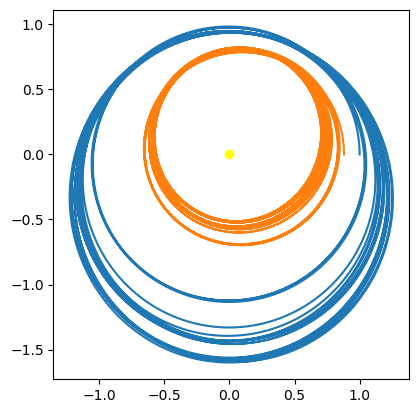

In [23]:
ci = [1,0,0,1,0.88,0,0,1]
sol,t = RK4(sist_sol,ci,[0,50*pi],[0.001,0.001],delta=0.0005)
plot(sol[0,:],sol[1,:],label="Tierra")
plot(sol[4,:],sol[5,:],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

In [15]:
from scipy.integrate import *

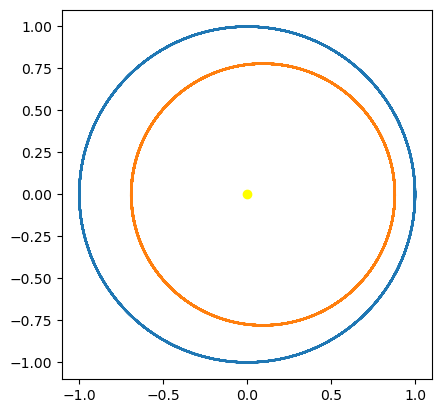

In [28]:
ti_tf = (0,50*pi)
t = arange(ti_tf[0],ti_tf[1], 0.1)
ci = array([1,0,0,1,0.88,0,0,1])
sol = solve_ivp(sist_sol,ti_tf, ci,t_eval=t,rtol=1e-8,atol=1e-8)
plot(sol.y[0],sol.y[1],label="Tierra")
plot(sol.y[4],sol.y[5],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

63


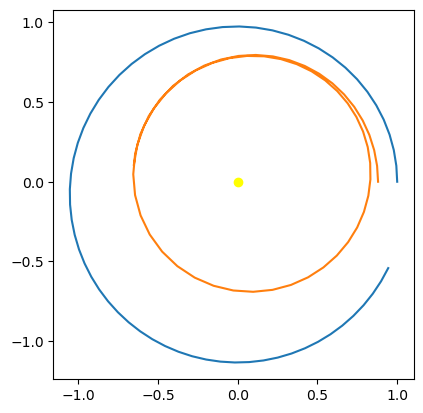

In [36]:
ti_tf= (0,2*pi)
t=arange(ti_tf[0],ti_tf[1],0.1)
ci = array([1,0,0,1,0.88,0,0,1])
sol = solve_ivp(sist_sol,ti_tf, ci, args=([0.001,0.001],),
                t_eval=t,rtol=1e-8,atol=1e-8)
plot(sol.y[0],sol.y[1],label="Tierra")
plot(sol.y[4],sol.y[5],label="Planetoide")
print(len(sol.t))
plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

79


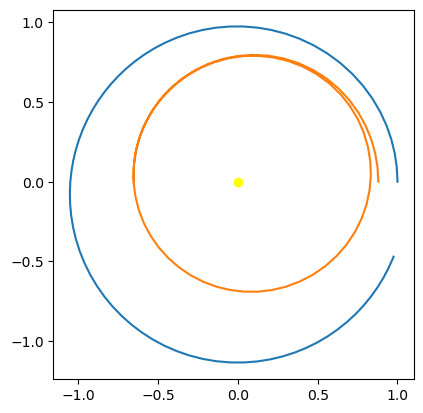

In [34]:
ti_tf= (0,2*pi)
#t=arange(ti_tf[0],ti_tf[1],0.1)
ci = array([1,0,0,1,0.88,0,0,1])
sol = solve_ivp(sist_sol,ti_tf, ci, args=([0.001,0.001],),
                rtol=1e-8,atol=1e-8)
plot(sol.y[0],sol.y[1],label="Tierra")
plot(sol.y[4],sol.y[5],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

In [42]:
ti_tf= (0,2*pi)
#t=arange(ti_tf[0],ti_tf[1],0.1)
ci = array([1,0,0,1,0.88,0,0,1])
sol = solve_ivp(sist_sol,ti_tf, ci, args=([0.001,0.001],),
                rtol=1e-8,atol=1e-8,dense_output=True)
t=linspace(ti_tf[0],ti_tf[1])
sol.sol(t)
#plot(sol.y[0],sol.y[1],label="Tierra")
#plot(sol.y[4],sol.y[5],label="Planetoide")

#plot([0],[0],'o',color='yellow')
#gca().set_aspect('equal')
#show()

array([[ 1.        ,  0.99121952,  0.96501807,  0.92181436,  0.8623032 ,
         0.78745308,  0.69850347,  0.5969585 ,  0.48457311,  0.36332865,
         0.23539706,  0.1030941 , -0.03117641, -0.16498452, -0.2959388 ,
        -0.42174973, -0.54028791, -0.64963364, -0.74811537, -0.83433577,
        -0.90718544, -0.96584506, -1.00977782, -1.03871423, -1.05263152,
        -1.05172969, -1.03640602, -1.00722959, -0.9649167 , -0.9103081 ,
        -0.84434838, -0.76806763, -0.68256565, -0.58899825, -0.48856576,
        -0.38250328, -0.27207248, -0.1585547 , -0.04324493,  0.07255349,
         0.1875339 ,  0.30039121,  0.40982705,  0.5145555 ,  0.61330959,
         0.70484899,  0.78796911,  0.86151198,  0.92437917,  0.97554687],
       [ 0.        ,  0.12787691,  0.25364658,  0.37520867,  0.49048478,
         0.5974459 ,  0.69415151,  0.77879703,  0.84976523,  0.90567729,
         0.94543952,  0.96828205,  0.97378681,  0.96190231,  0.93294408,
         0.88758027,  0.82680352,  0.75189126,  0.

In [52]:
ti_tf= (0,10*pi)
#t=arange(ti_tf[0],ti_tf[1],0.1)
ci = array([1,0,0,1,0.88,0,0,1])
mov_planetario = solve_ivp(sist_sol,ti_tf, ci, args=([0.001,0.001],),
                rtol=1e-8,atol=1e-8,dense_output=True)


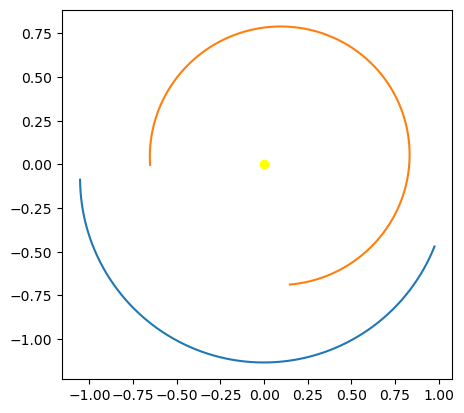

In [53]:
t=linspace(pi,2*pi,400)
mov_planetario.sol(t)

plot(mov_planetario.sol(t)[0],mov_planetario.sol(t)[1],label="Tierra")
plot(mov_planetario.sol(t)[4],mov_planetario.sol(t)[5],label="Planetoide")



plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

In [60]:
from numpy import *

In [61]:
def raiz_newton_mod(func,x0,err = 1e-5):
    fi , dfi = func(x0)[0], func(x0)[2]
    dif_raiz , cont = err + 1 , 0
    while abs(fi) > err and dif_raiz > err:
        xref = x0
        x0 = x0 - (fi/dfi)
        fi , dfi = func(x0)[0], func(x0)[2]
        dif_raiz = abs(xref - x0)
        cont += 1
    print("Número de iteraciones: ",cont)
    return x0

Número de iteraciones:  2


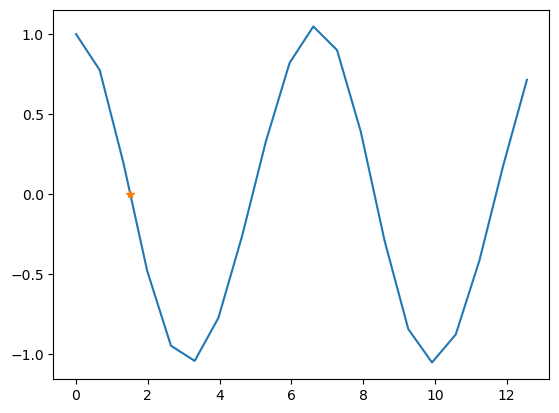

In [67]:
t = linspace(0,4*pi,20)
plot(t,mov_planetario.sol(t)[0])

t0=raiz_newton_mod(mov_planetario.sol,1.9)
plot(t0,mov_planetario.sol(t0)[0],'*')